In [7]:
 #! pip install -q kaggle
 #from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dataperspective","key":"025023815b921f52d779dda9addb5c70"}'}

In [11]:
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list


ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31            387  
shivan118/healthcare-analytics                         Healthcare Analytics                                2MB  2020-09-13 17:40:05            266  
Cornell-University/arxiv                               arXiv Dataset                                     885MB  2020-09-14 16:54:47           2797  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND ETHNICITY (FACE DATA) CSV          63MB  2020-09-02 13:46:38            174  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification       

In [12]:
! kaggle competitions download -c 'dogs-vs-cats'

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 86.0MB/s]
 99% 538M/543M [00:09<00:00, 77.7MB/s]
100% 543M/543M [00:09<00:00, 62.7MB/s]
 90% 243M/271M [00:07<00:01, 29.4MB/s]
100% 271M/271M [00:07<00:00, 36.3MB/s]


In [15]:
#! mkdir train
#! unzip train.zip -d train
#! unzip test1.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/test1/55.jpg      
  inflating: train/test1/550.jpg     
  inflating: train/test1/5500.jpg    
  inflating: train/test1/5501.jpg    
  inflating: train/test1/5502.jpg    
  inflating: train/test1/5503.jpg    
  inflating: train/test1/5504.jpg    
  inflating: train/test1/5505.jpg    
  inflating: train/test1/5506.jpg    
  inflating: train/test1/5507.jpg    
  inflating: train/test1/5508.jpg    
  inflating: train/test1/5509.jpg    
  inflating: train/test1/551.jpg     
  inflating: train/test1/5510.jpg    
  inflating: train/test1/5511.jpg    
  inflating: train/test1/5512.jpg    
  inflating: train/test1/5513.jpg    
  inflating: train/test1/5514.jpg    
  inflating: train/test1/5515.jpg    
  inflating: train/test1/5516.jpg    
  inflating: train/test1/5517.jpg    
  inflating: train/test1/5518.jpg    
  inflating: train/test1/5519.jpg    
  inflating: train/test1/552.jpg     
  inflating: train/test1/5520.jpg    

In [1]:
mport glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

In [ ]:
IMG_DIM = (150, 150)

train_files = glob.glob('train/train/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('train/test1/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

In [3]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [4]:
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

IndexError: ignored

In [ ]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

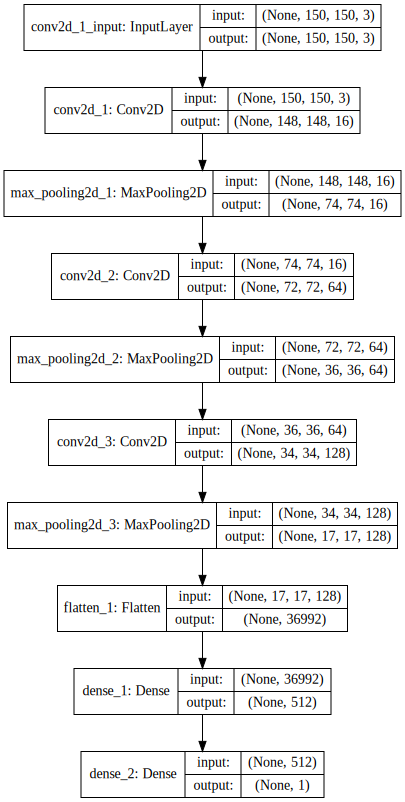

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 10s - loss: 0.7583 - acc: 0.5627 - val_loss: 0.7182 - val_acc: 0.5520
Epoch 2/30
3000/3000 [==============================] - 8s - loss: 0.6343 - acc: 0.6533 - val_loss: 0.5891 - val_acc: 0.7190
Epoch 3/30
3000/3000 [==============================] - 8s - loss: 0.5274 - acc: 0.7403 - val_loss: 0.5661 - val_acc: 0.7140
Epoch 4/30
3000/3000 [==============================] - 8s - loss: 0.4578 - acc: 0.7957 - val_loss: 0.5587 - val_acc: 0.7350
Epoch 5/30
3000/3000 [==============================] - 8s - loss: 0.3531 - acc: 0.8390 - val_loss: 0.6551 - val_acc: 0.7350
Epoch 6/30
3000/3000 [==============================] - 8s - loss: 0.2653 - acc: 0.8830 - val_loss: 0.7276 - val_acc: 0.7310
Epoch 7/30
3000/3000 [==============================] - 8s - loss: 0.2216 - acc: 0.9133 - val_loss: 0.8435 - val_acc: 0.7300
Epoch 8/30
3000/3000 [==============================] - 8s - loss: 0.1162 - 

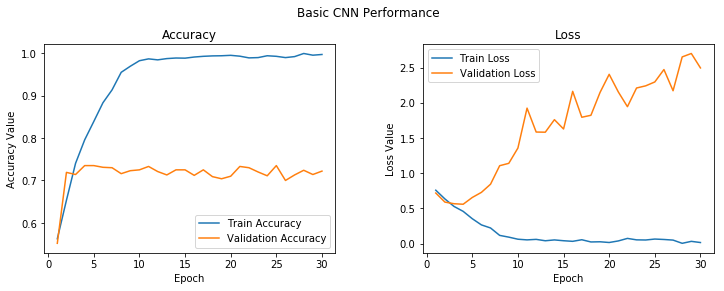

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 7s - loss: 0.6945 - acc: 0.5487 - val_loss: 0.7341 - val_acc: 0.5210
Epoch 2/30
3000/3000 [==============================] - 7s - loss: 0.6601 - acc: 0.6047 - val_loss: 0.6308 - val_acc: 0.6480
Epoch 3/30
3000/3000 [==============================] - 7s - loss: 0.6327 - acc: 0.6537 - val_loss: 0.6367 - val_acc: 0.6870
Epoch 4/30
3000/3000 [==============================] - 7s - loss: 0.5912 - acc: 0.6853 - val_loss: 0.7449 - val_acc: 0.6320
Epoch 5/30
3000/3000 [==============================] - 7s - loss: 0.5632 - acc: 0.7067 - val_loss: 0.5703 - val_acc: 0.7370
Epoch 6/30
3000/3000 [==============================] - 7s - loss: 0.5397 - acc: 0.7433 - val_loss: 0.5375 - val_acc: 0.7360
Epoch 7/30
3000/3000 [==============================] - 7s - loss: 0.4706 - acc: 0.7800 - val_loss: 0.5222 - val_acc: 0.7480
Epoch 8/30
3000/3000 [==============================] - 7s - loss: 0.4381 - a

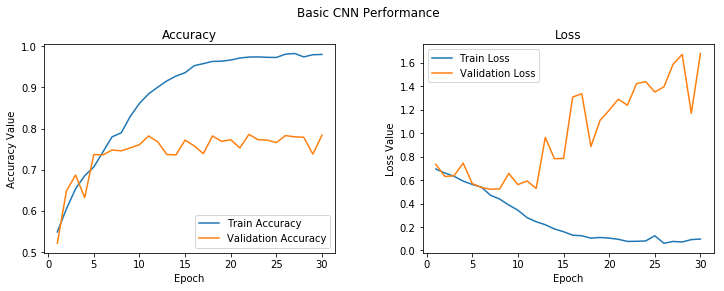

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('cats_dogs_basic_cnn.h5')